#### Resumo da Análise de Correspondência Múltipla (MCA) no Projeto de Arboviroses

O Que é MCA?

A Análise de Correspondência Múltipla (MCA) é uma técnica estatística usada para analisar e visualizar associações entre variáveis categóricas. No contexto do nosso projeto de análise de exames de arboviroses (Dengue, Zika e Chikungunya), a MCA foi utilizada para descobrir padrões e associações entre os resultados dos exames e o tempo de recebimento (diferença entre data de coleta e data de recebimento).

#### IMPORTAÇÃO DE BIBLIOTECAS

In [19]:
import pandas as pd
from glob import glob
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.io as pio
import plotly.graph_objects as go
from itertools import combinations

#### IMPORTAÇÃO DE BASES DE DADOS

In [6]:
df_ajust = pd.read_excel('df_ajust.xlsx')

df_ajust.set_index('Unnamed: 0', inplace=True)

display(df_ajust)

,exame_ajus,status_receb,resultado
Unnamed: 0,,,
6,Chikungunya,recebido_ate_1_dia,Negativo
7,Dengue,recebido_ate_1_dia,Negativo
8,Zika,recebido_ate_1_dia,Negativo
9,Dengue,recebido_ate_1_dia,Negativo
19,Dengue,recebido_ate_1_dia,Negativo
...,...,...,...
17938,Dengue,recebido_entre_1_e_2_dias,Negativo
17941,Zika,recebido_entre_1_e_2_dias,Negativo
17950,Chikungunya,recebido_ate_1_dia,Negativo


#### EXPLORAÇÃO DOS DADOS

O código iterativamente percorre todas as colunas do DataFrame df_ajust, imprimindo a contagem de valores (incluindo valores nulos) para cada coluna, seguida de uma linha de asteriscos para separação visual.

In [7]:
for i in df_ajust.columns:
    print(df_ajust[i].value_counts(dropna=False))
    print(50*'*')

exame_ajus
Dengue         14762
Chikungunya    13248
Zika           12110
Name: count, dtype: int64
**************************************************
status_receb
recebido_ate_1_dia            21985
recebido_entre_1_e_2_dias      8957
recebido_entre_2_e_5_dias      6710
recebido_entre_5_e_10_dias     1913
recebido_após_10_dia            555
Name: count, dtype: int64
**************************************************
resultado
Negativo    37752
Positivo     2368
Name: count, dtype: int64
**************************************************


O código a seguir avalia a associação entre todas as combinações de pares de colunas no DataFrame df_ajust usando o teste qui-quadrado. Ele identifica se cada combinação tem uma associação significativa ao nível de 5% e armazena essas informações em listas para análise posterior.

In [8]:
def significancia(pvalue):
    if pvalue <= 0.05:
        res = "Associação significativa ao nível de significãnciade de 5%"
    else:
        res = "Associação não significativa ao nível de significãncia de 5%"
    return res

comb_2 = []
pvl = []
signif = []

for item in list(combinations(df_ajust.columns, 2)):
    #print(item, "\n")
    comb_2.append(item)
    tabela = pd.crosstab(df_ajust[item[0]], df_ajust[item[1]])
    
    #print(tabela)    
    
    chi2, pvalor, gl, freq_esp = chi2_contingency(tabela)

    #print(f"estatística qui²: {round(chi2, 2)}")
    #print(f"p-valor da estatística: {round(pvalor, 4)}", "\n")
    pvl.append(round(pvalor, 4))    

    sig = significancia(round(pvalor, 4))

    #print(sig)

    signif.append(sig)

    #print(50*'*')

In [9]:
tab_sig = pd.DataFrame({'combinacao': comb_2,
                        'pvalor': pvl,
                        'result': signif
                        })

display(tab_sig)

,combinacao,pvalor,result
0,"(exame_ajus, status_receb)",0.94,Associação não significativa ao nível de signi...
1,"(exame_ajus, resultado)",0.00,Associação significativa ao nível de significã...
2,"(status_receb, resultado)",0.00,Associação significativa ao nível de significã...


#### ELABORANDO A MCA

In [10]:
mca = prince.MCA(n_components=2).fit(df_ajust)

In [11]:
# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(50*'*')
print(f"quantidade de variáveis: {mca.K_}")
print(50*'*')
print(f"quantidade de dimensões: {quant_dim}")
print(50*'*')

quantidade total de categorias: 10
**************************************************
quantidade de variáveis: 3
**************************************************
quantidade de dimensões: 7
**************************************************


#### OBTENDO OS EIGENVALUES

In [12]:
#%% Obtendo os eigenvalues

tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.391        16.75%                     16.75%
1              0.335        14.36%                     31.11%


#### INÉRCIA PRINCIPAL TOTAL

In [13]:
# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

2.333333333333333


#### OBTENDO AS COORDENADAS PRINCIPAIS DAS CATEGORIAS DAS VARIÁVEIS

In [14]:
coord_burt = mca.column_coordinates(df_ajust)

print(coord_burt)

                                                0         1
exame_ajus_Chikungunya                  -0.000199  0.015465
exame_ajus_Dengue                       -0.003621 -0.010953
exame_ajus_Zika                          0.004632 -0.003567
status_receb_recebido_após_10_dia        0.002723  0.012601
status_receb_recebido_ate_1_dia         -0.006715 -0.016332
status_receb_recebido_entre_1_e_2_dias   0.006260  0.009988
status_receb_recebido_entre_2_e_5_dias   0.010919  0.017085
status_receb_recebido_entre_5_e_10_dias  0.008776  0.077348
resultado_Negativo                      -0.000650 -0.000034
resultado_Positivo                       0.010368  0.000542


#### OBTENDO AS COORDENADAS-PADRÃO DAS CATEGORIAS DAS VARIÁVEIS

In [15]:
coord_padrao = mca.column_coordinates(df_ajust)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                                                0         1
exame_ajus_Chikungunya                  -0.000318  0.026721
exame_ajus_Dengue                       -0.005792 -0.018925
exame_ajus_Zika                          0.007409 -0.006162
status_receb_recebido_após_10_dia        0.004355  0.021772
status_receb_recebido_ate_1_dia         -0.010741 -0.028219
status_receb_recebido_entre_1_e_2_dias   0.010012  0.017257
status_receb_recebido_entre_2_e_5_dias   0.017464  0.029520
status_receb_recebido_entre_5_e_10_dias  0.014037  0.133641
resultado_Negativo                      -0.001040 -0.000059
resultado_Positivo                       0.016583  0.000936


#### OBTENDO AS COORDENADAS DAS OBSERVAÇÕES DO BANCO DE DADOS

In [16]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(df_ajust)

print(coord_obs)

                   0         1
Unnamed: 0                    
6           0.021578  0.034130
7           0.139350 -0.847712
8          -0.742825 -0.323112
9           0.139350 -0.847712
19          0.139350 -0.847712
...              ...       ...
17938       0.114458 -0.050173
17941      -0.767716  0.474428
17950       0.021578  0.034130
17951       0.139350 -0.847712
17954      -0.742825 -0.323112

[40120 rows x 2 columns]


#### PLOTANDO O MAPA PERCEPTUAL (COORDENADAS-PADRÃO)

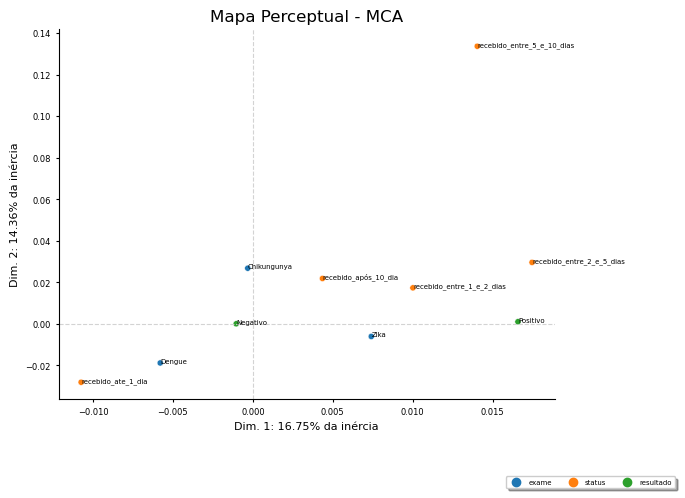

In [17]:
# Primeiro passo: gerar um DataFrame detalhado

chart = coord_padrao.reset_index()

nome_categ=[]
for col in df_ajust:
    nome_categ.append(df_ajust[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

#var_chart = pd.Series(chart['index'])

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        #ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)
        ax.text(point['x'], point['y'], point['val'], fontsize=5)



label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.25,-0.2), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

#### Análise do Mapa Perceptual - MCA

O mapa perceptual acima, resultado da Análise de Correspondência Múltipla (MCA) que relaciona diferentes variáveis envolvidas nos exames de arboviroses. Vamos explorar os pontos principais desse gráfico:

Dimensões:

- Dimensão 1 (16.75% da inércia): Captura a maior parte da variação nos dados.

- Dimensão 2 (14.36% da inércia): Captura a segunda maior parte da variação.

##### Interpretação

- Recebido em até 1 dia: Associado com os exames de Dengue.

- Recebido após 10 dias: Mais próximo dos resultados negativos e Chikungunya.

Associação Temporal:

- Exames recebidos rapidamente (até 1 dia) estão mais associados a casos de Dengue.

- Exames com tempos de recebimento mais longos (entre 5 e 10 dias) estão mais associados a resultados positivos, o que pode sugerir uma possível relação entre o tempo de processamento e a positividade do exame.

Distribuição das Doenças:

- Chikungunya está mais associado a tempos de recebimento prolongados e resultados negativos.

- Zika está mais centralizado, indicando uma distribuição equilibrada entre os resultados positivos e negativos.

##### Conclusão

Este mapa perceptual nos ajuda a visualizar a complexa relação entre os diferentes tempos de recebimento dos exames e os resultados das diferentes arboviroses. A análise sugere que há uma associação entre o tempo de recebimento e os tipos de exames, com Dengue tendendo a ser recebida mais rapidamente e Chikungunya mostrando uma tendência a tempos de recebimento mais longos e resultados negativos.

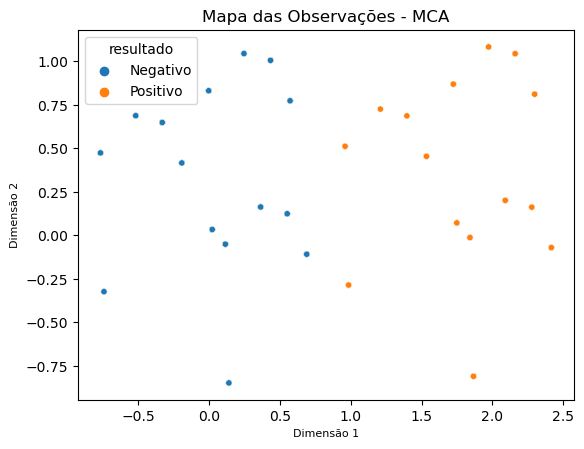

In [18]:
#%% Gráfico das observações

coord_obs['resultado'] = df_ajust['resultado']

sns.scatterplot(data=coord_obs, x=0, y=1, hue='resultado', s=20)
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()

Esse gráfico apenas reforça a informação vista no gráfico anterior, onde exames que apresentaram resultados negativos estão mais no lado esquerdo e os que apresentaram resultados positivos estão no lado direito.